### Importing the Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
tf.__version__ 

'2.18.0'

### Part 1 - Data Preprocessing

#### Generating images for the Training set

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values
    shear_range=0.3,         # More aggressive shearing
    zoom_range=0.3,          # More zooming variation
    rotation_range=20,       # Introduce random rotations
    width_shift_range=0.2,   # Allow horizontal shifts
    height_shift_range=0.2,  # Allow vertical shifts
    brightness_range=[0.8, 1.2],  # Random brightness adjustment
    horizontal_flip=True,    # Flip images horizontally
    fill_mode="nearest"      # Fill in missing pixels after transformation
)

#### Generating images for the Test set

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)

### Creating the Training set

In [6]:
training_set = train_datagen.flow_from_directory('../dataSet/trainingData',                                
                                                 target_size = (128, 128),
                                                 batch_size = 10,
                                                 color_mode = 'grayscale',                                
                                                 class_mode = 'categorical')

Found 12845 images belonging to 27 classes.


In [7]:
test_set = test_datagen.flow_from_directory('../dataSet/testingData',
                                            target_size = (128, 128),                                  
                                            batch_size = 10,    
                                            color_mode = 'grayscale',
                                            class_mode = 'categorical')

Found 4268 images belonging to 27 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D, Dense, Dropout, Input

model = Sequential([
    Input(shape=(128, 128, 1)),  

    Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2, padding='valid'),

    Conv2D(128, kernel_size=3, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2, padding='valid'),

    Conv2D(128, kernel_size=3, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2, padding='valid'),

    Conv2D(256, kernel_size=3, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2, padding='valid'),

    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(96, activation='relu'),
    Dropout(0.3),

    Dense(64, activation='relu'), 

    Dense(27, activation='softmax')  
])

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 96)             │        12,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 27)             │         1,755 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 572,795 (2.19 MB)

 Trainable params: 571,643 (2.18 MB)

 Non-trainable params: 1,152 (4.50 KB)

#### Saving the Model

In [14]:
history = model.fit(training_set,
                  epochs =15,
                  validation_data = test_set,initial_epoch=14)

Epoch 15/15
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 509s 396ms/step - accuracy: 0.9777 - loss: 0.0758 - val_accuracy: 0.7331 - val_loss: 1.7963


In [11]:
history = model.fit(training_set,
                  epochs =10,
                  validation_data = test_set,initial_epoch=2)

Epoch 3/10


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1285/1285 ━━━━━━━━━━━━━━━━━━━━ 563s 437ms/step - accuracy: 0.7895 - loss: 0.5971 - val_accuracy: 0.1905 - val_loss: 8.2038
Epoch 4/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 527s 410ms/step - accuracy: 0.8903 - loss: 0.3328 - val_accuracy: 0.5769 - val_loss: 1.8548
Epoch 5/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 527s 410ms/step - accuracy: 0.9281 - loss: 0.2288 - val_accuracy: 0.5916 - val_loss: 2.4119
Epoch 6/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 532s 414ms/step - accuracy: 0.9433 - loss: 0.1716 - val_accuracy: 0.5019 - val_loss: 3.2231
Epoch 7/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 523s 407ms/step - accuracy: 0.9579 - loss: 0.1391 - val_accuracy: 0.6230 - val_loss: 2.8727
Epoch 8/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 521s 405ms/step - accuracy: 0.9623 - loss: 0.1190 - val_accuracy: 0.5670 - val_loss: 3.4144
Epoch 9/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 513s 399ms/step - accuracy: 0.9648 - loss: 0.1203 - val_accuracy: 0.7912 - val_loss: 1.4721
Epoch 10/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 555s 432ms/step - accuracy: 0.

In [15]:

model.save("model_new2.keras")
print("Model saved in .keras format")

Model saved in .keras format


In [16]:
from tensorflow import keras
model = keras.models.load_model("model_new2.keras")
test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


427/427 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step - accuracy: 0.7249 - loss: 1.8180
Test Accuracy: 73.31%
Test Loss: 1.7963


In [17]:
test_loss, test_accuracy = model.evaluate(training_set)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

1285/1285 ━━━━━━━━━━━━━━━━━━━━ 88s 69ms/step - accuracy: 0.9927 - loss: 0.0253
Test Accuracy: 99.34%
Test Loss: 0.0211


427/427 ━━━━━━━━━━━━━━━━━━━━ 30s 71ms/step
              precision    recall  f1-score   support

           0       0.05      0.05      0.05       154
           1       0.06      0.06      0.06       156
           2       0.06      0.02      0.03       157
           3       0.05      0.01      0.02       156
           4       0.04      0.12      0.06       155
           5       0.02      0.01      0.01       156
           6       0.00      0.00      0.00       165
           7       0.04      0.05      0.05       153
           8       0.01      0.01      0.01       165
           9       0.00      0.00      0.00       157
          10       0.03      0.01      0.02       166
          11       0.04      0.08      0.06       164
          12       0.05      0.03      0.04       155
          13       0.05      0.09      0.06       165
          14       0.06      0.06      0.06       163
          15       0.04      0.08      0.06       167
          16       0.02      0.03     

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

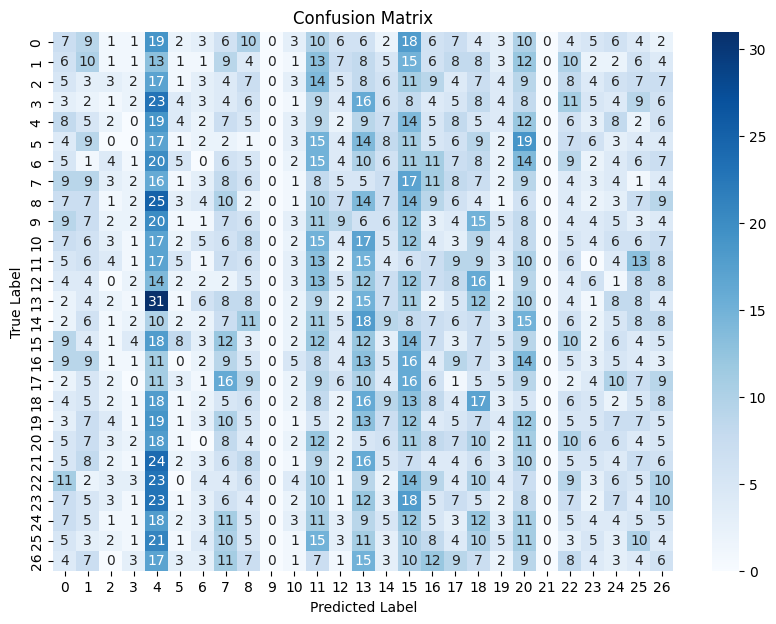

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
# Get true labels
y_true = test_set.classes

# Get predicted labels
y_pred = np.argmax(model.predict(test_set), axis=1)

# Print classification report
print(classification_report(y_true, y_pred))

# Display confusion matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
